
<h1 style = "color : Brown"> Lending Club Case Study </h1>


##### By Yeshvanth H J

## Business Understanding

working for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Objective


The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Redaing the data from google drive link
loan_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Lending Case Study/loan.csv')

In [4]:
# To check any unwanted headder exist in data set
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_df.shape

(39717, 111)

## Data CleanUp

Checking if There any column contain all/most null values

In [6]:
isnull_col=loan_df.isnull().sum()
isnull_col.loc[isnull_col.values>10000]

desc                              12940
mths_since_last_delinq            25682
mths_since_last_record            36931
next_pymnt_d                      38577
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717
open_rv_24m                       39717
max_bal_bc                        39717
all_util                          39717
total_rev_hi_lim                  39717
inq_fi                            39717
total_cu_tl                       39717
inq_last_12m                      39717


Let's drop all the null value colum where having more than 10k null values

In [7]:
loan_df.drop(columns=list(isnull_col.loc[isnull_col.values>10000].index),inplace=True)
loan_df.shape

(39717, 53)

* As we that number of columns are dropped from 111 to 53

* As observed that several colums having same values for all entries.
   Those columns will not contribue anything to our analysis.

In [8]:
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [9]:
isunique_col=loan_df.nunique()
isunique_col[isunique_col.values==1].index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

Dropping those columns where having same values

In [10]:
loan_df.drop(columns=list(isunique_col[isunique_col.values==1].index),inplace=True)
loan_df.shape

(39717, 44)

In [11]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

### As observed that Columns are reduced from 111 to 44, data still contain some post approval created column

1. Our objective is to know which loan application are risky. The fields are created after loan approval dos't contribute anything to our analysis *('id','member_id','url','zip_code','last_credit_pull_d','last_pymnt_d','last_pymnt_amnt','collection_recovery_fee','total_rec_prncp''otal_rec_int','total_rec_late_fee', 'recoveries','out_prncp', 'out_prncp_inv','total_pymnt','total_pymnt_inv')*
2. Zip code may usefull but it not contain full data which may impact negative analysis.
3. 'out_prncp_inv','total_pymnt_inv' not contributing to our analysis & it may help to investers.

In [12]:
loan_df.drop(columns=['id','member_id','url','zip_code','emp_title','last_credit_pull_d','last_pymnt_d','last_pymnt_amnt','collection_recovery_fee','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','out_prncp', 'out_prncp_inv', 'total_pymnt','pub_rec_bankruptcies','total_pymnt_inv'],inplace=True)

In [13]:
loan_df.shape

(39717, 26)

The main aim of this analysis is to identify who is likely to default

*   Loan status "Current" will not add any usefull insights hence   
     filtering out from data frame.

In [14]:
loan_df=loan_df[loan_df.loan_status!='Current']
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
loan_df.shape

(38577, 26)

Checking for Missing Values

In [16]:
100*loan_df.isna().mean()

loan_amnt              0.000000
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
title                  0.028514
addr_state             0.000000
dti                    0.000000
delinq_2yrs            0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_bal              0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

Columns with missing values are "emp_length " & "revol_util"

In [17]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

As we looking above output that the high diffrence with next value hence safely we can consider higher mode vlue & also verry less percentage in missing values.

In [18]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0],inplace=True)
loan_df.emp_length.isna().sum()

0

In [19]:
loan_df.dropna(axis=0,subset=['revol_util'],inplace=True)
loan_df.revol_util.isna().sum()

0

In [20]:
len(loan_df.title.value_counts())

19265

In [21]:
loan_df.title.sample(10)

13421                                   ninja
29493                             Coslidation
37184                   Out of debt for good!
39552                             consolidate
3928                       Debt Consolidation
30900                               easymoney
9903           Responsible Debt Consolidation
10384                      Debt Consolidation
39572                 Pay Credit Card Balance
36060    Building a bridge to new opportunity
Name: title, dtype: object

Title column has tomany unique values & not provide usefull info, hence drop the column


In [22]:
loan_df.drop(columns=['title'],inplace=True)

## Data Standardization

*   "revol_util" & "int_rate" it has continues values and required to eliminate
      % from the column
*  Assumptions:- "emp_length"-->{(<1 year) is considered as 0 and 10+ year
    considered as 10}



In [23]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   funded_amnt_inv      38527 non-null  float64
 3   term                 38527 non-null  object 
 4   int_rate             38527 non-null  object 
 5   installment          38527 non-null  float64
 6   grade                38527 non-null  object 
 7   sub_grade            38527 non-null  object 
 8   emp_length           38527 non-null  object 
 9   home_ownership       38527 non-null  object 
 10  annual_inc           38527 non-null  float64
 11  verification_status  38527 non-null  object 
 12  issue_d              38527 non-null  object 
 13  loan_status          38527 non-null  object 
 14  purpose              38527 non-null  object 
 15  addr_state           38527 non-null 

In [24]:
loan_df.revol_util=loan_df.revol_util.str.strip('%').astype(float)

In [25]:
loan_df.int_rate=loan_df.int_rate.str.strip('%').astype(float)

In [26]:
loan_df.emp_length=loan_df.emp_length.apply(lambda x: ("".join(filter(str.isdigit,str(x)))))

In [27]:
loan_df.emp_length=loan_df.emp_length.astype(int)

In [28]:
loan_df['issue_year']='20'+loan_df.issue_d.apply(lambda x:x.split('-')[1])
loan_df['issue_month']=loan_df.issue_d.apply(lambda x:x.split('-')[0])

## Finding Outlier values

<Axes: >

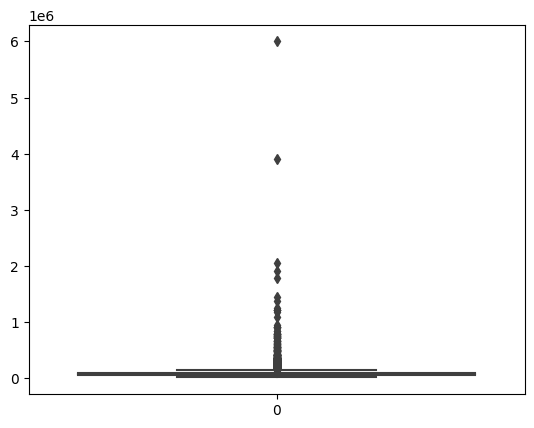

In [29]:
sns.boxplot(loan_df.annual_inc)

Above graph clerly indicating that presance of outliers, so Remove them.
The values after 95 percentile seems to be disconnected from the general distribution. Assuming the threshold for removing ouliers as 0.95

In [30]:
loan_df.annual_inc.quantile([0.5,0.75,0.90,0.95,0.97,0.98,0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [31]:
loan_df=loan_df[loan_df.annual_inc<=loan_df.annual_inc.quantile(0.95)]

<Axes: >

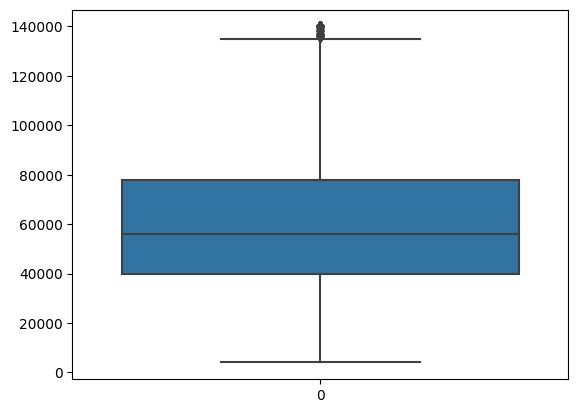

In [32]:
sns.boxplot(loan_df.annual_inc)

<Axes: >

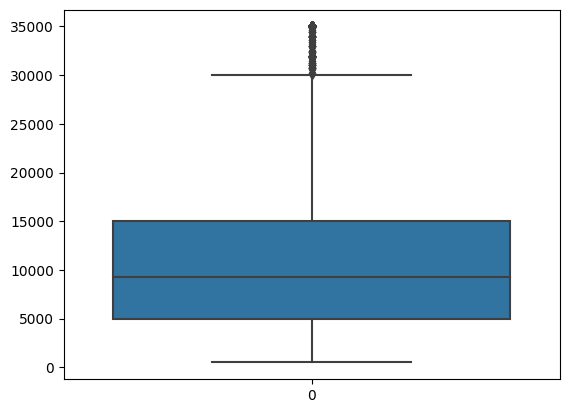

In [33]:
sns.boxplot(loan_df.loan_amnt)

<Axes: >

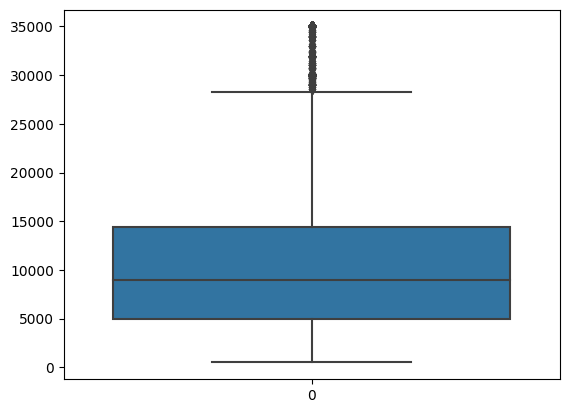

In [34]:
sns.boxplot(loan_df.funded_amnt)

<Axes: >

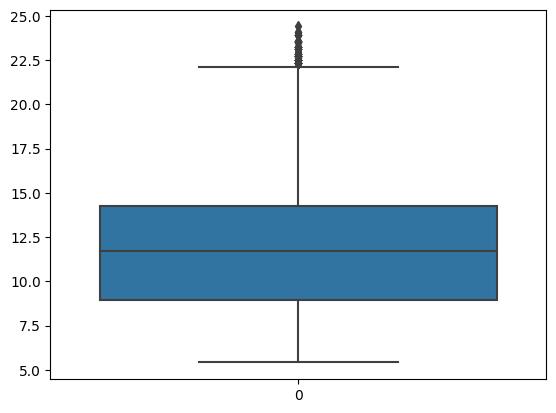

In [35]:
sns.boxplot(loan_df.int_rate)

<Axes: >

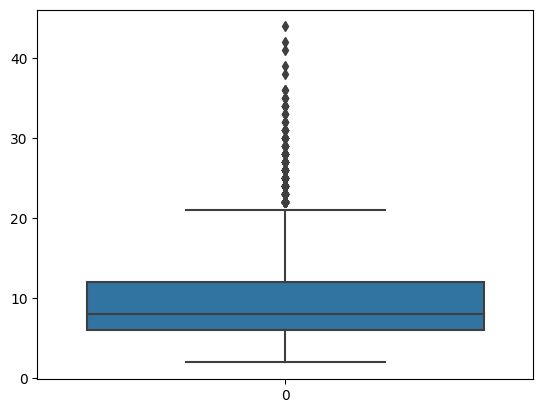

In [36]:
sns.boxplot(loan_df.open_acc)

### We have the clean Data Now

### 1). Univarient Analysis

In [37]:

loan_df['loan_amnt_group']=pd.cut(loan_df.loan_amnt,bins=[0,5000,10000,15000,20000,max(loan_df.loan_amnt)],labels=['0-5k','5k-10k','10k-15k','15k-20k','20k above'])

In [38]:
loan_df['annual_inc_grop']=pd.cut(loan_df.annual_inc,bins=[0,20000,40000,50000,60000,70000,80000,max(loan_df.annual_inc)],labels=['0-20k','20k-40k','40k-50k','50k-60k','60k-70k','70k-80k','80k above'])

In [39]:
loan_df['int_rate_group']=pd.cut(loan_df.int_rate,bins=[5,8,11,14,17,20,max(loan_df.int_rate)],labels=['5%-8%','8%-11%','11%-14%','14%-17%','17%-20%','20% above'])

In [40]:
loan_df['open_acc_group']=pd.cut(loan_df.open_acc,bins=[0,10,20,30,40,max(loan_df.open_acc)],labels=['0-10','10-20','20-30','30-40','40 above'])

In [41]:
loan_df['dti_group']=pd.cut(loan_df.dti,bins=[0,5,10,15,20,25,max(loan_df.dti)],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

Loan Status Analysis

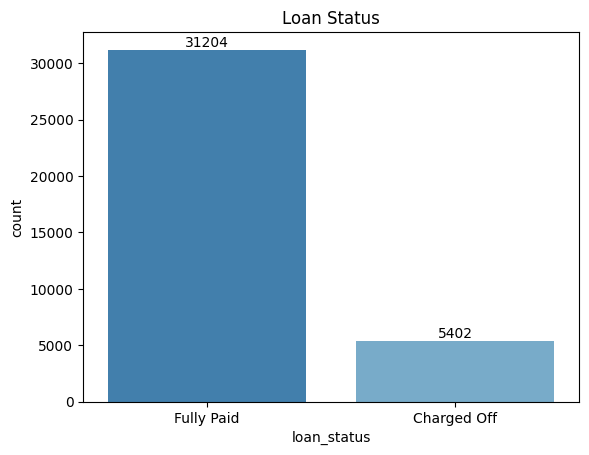

In [42]:
ax=sns.countplot(data=loan_df,x=loan_df.loan_status,palette='tab20c')
sns.countplot(data=loan_df,x=loan_df.loan_status,palette='tab20c')
plt.title('Loan Status')
ax.bar_label(ax.containers[0])
plt.show()

In [43]:
univarient_list=['annual_inc_grop','emp_length','grade', 'home_ownership', 'inq_last_6mths','int_rate_group', 'issue_month', 'issue_year','loan_amnt_group','open_acc_group','pub_rec','term','verification_status','dti_group']

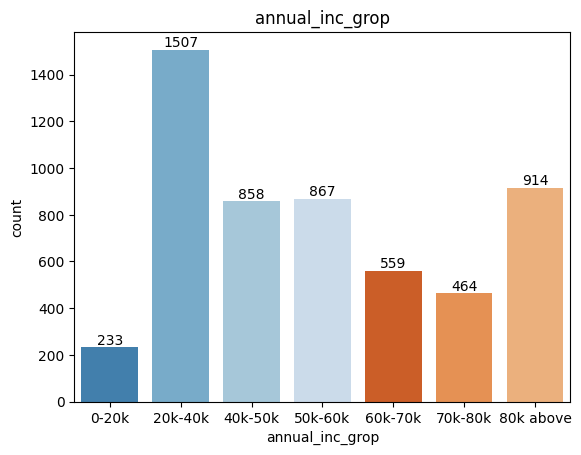

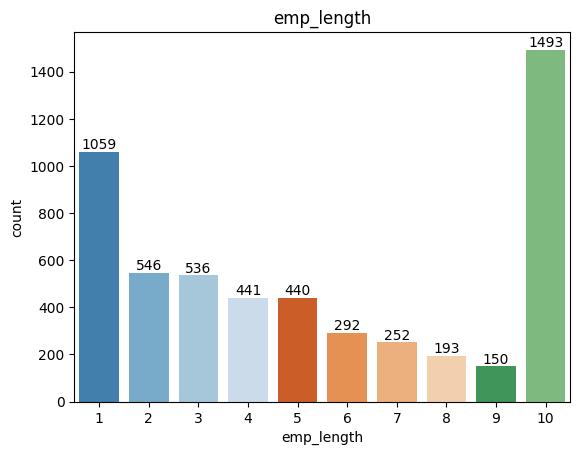

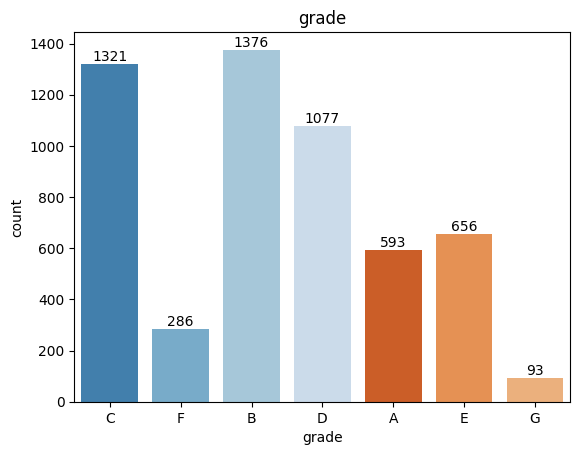

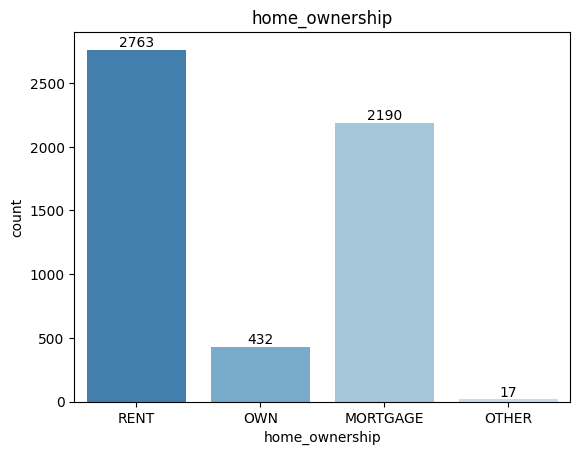

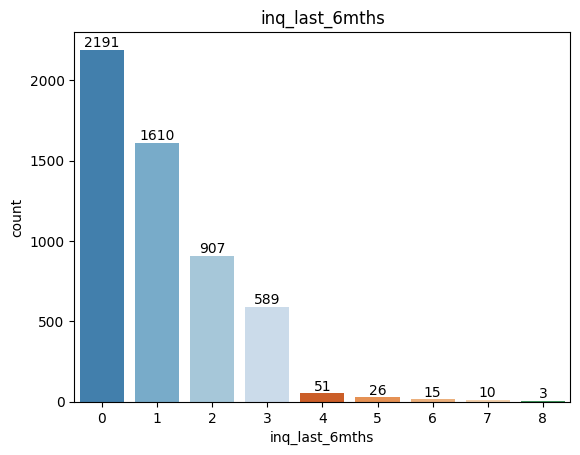

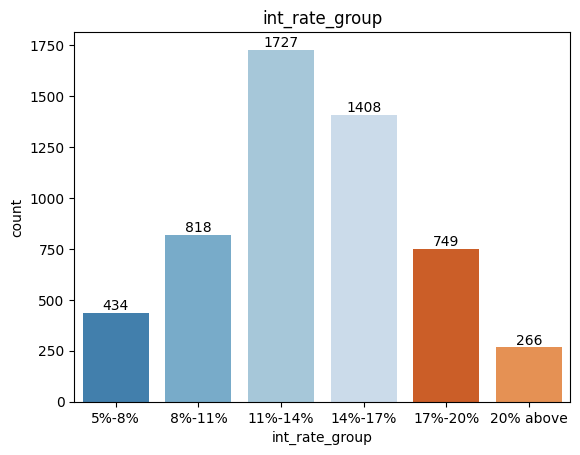

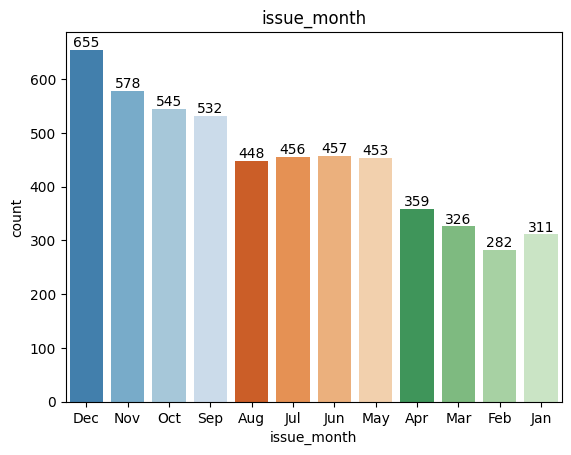

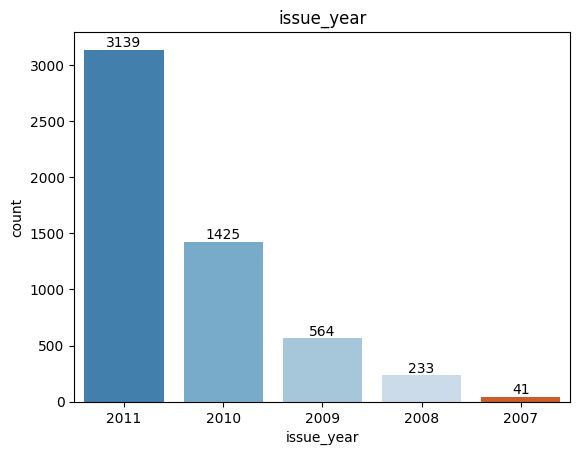

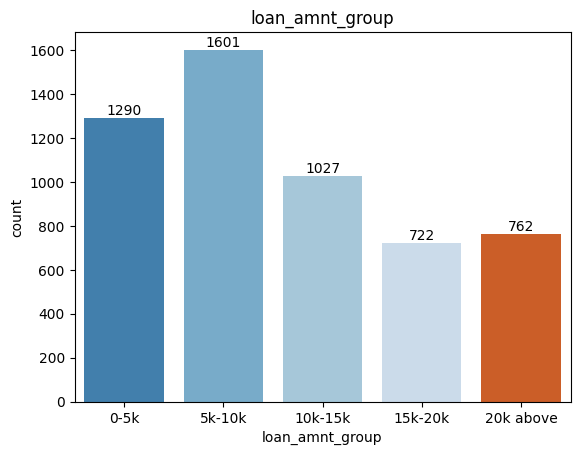

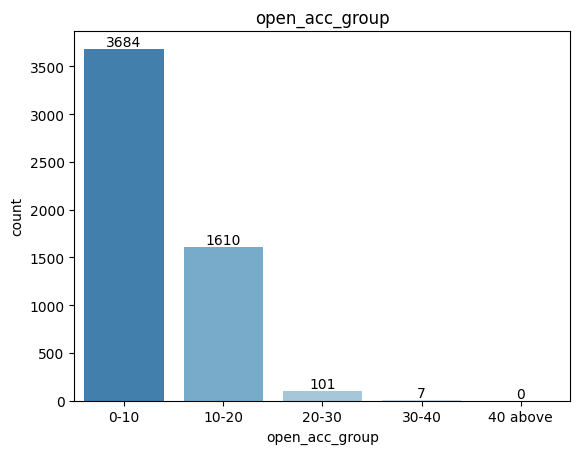

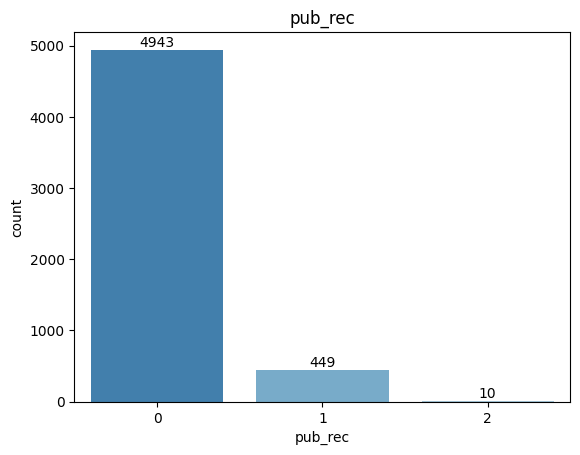

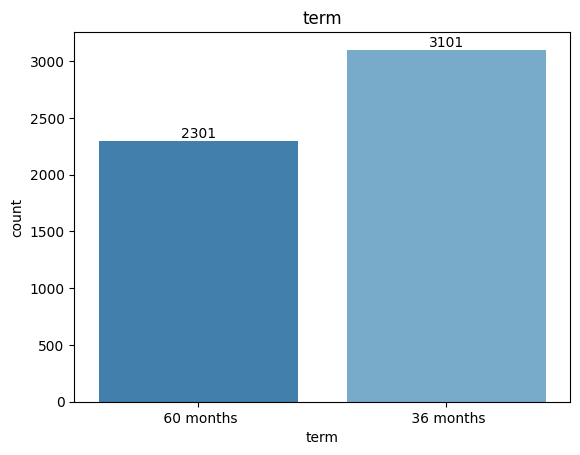

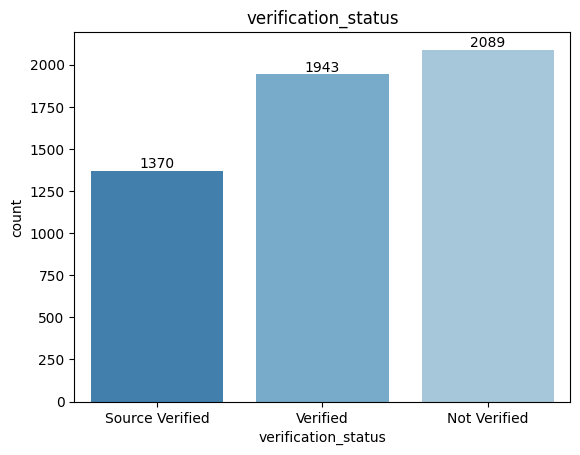

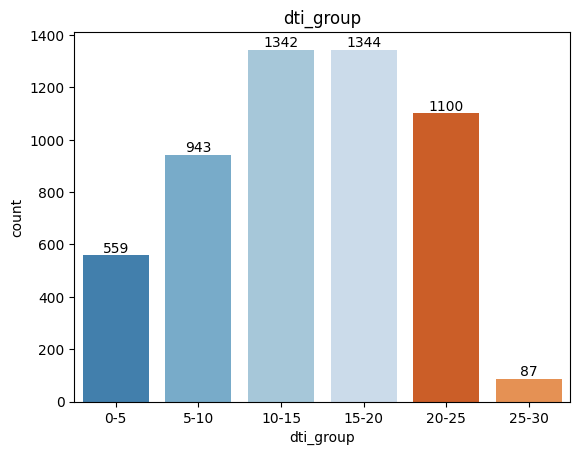

In [44]:
for col in univarient_list:
  ax=sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'],x=col,palette='tab20c')
  sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'],x=col,palette='tab20c')
  plt.title(col)
  ax.bar_label(ax.containers[0])
  plt.show()

<Axes: ylabel='loan_amnt'>

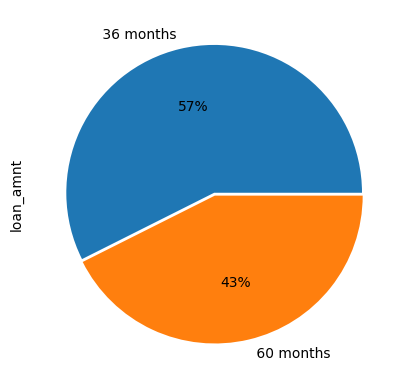

In [45]:
loan_df[loan_df.loan_status=='Charged Off'].groupby(['term']).count().loan_amnt.plot(kind='pie',y='loan_amnt',autopct='%1.0f%%',explode=(0.01,0.01))

<Axes: ylabel='loan_amnt'>

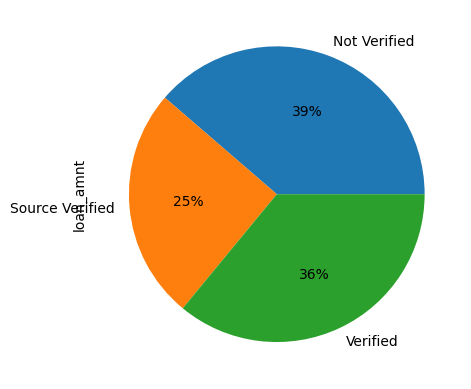

In [46]:
loan_df[loan_df.loan_status=='Charged Off'].groupby(['verification_status']).count().loan_amnt.plot(kind='pie',y='verification_status',autopct='%1.0f%%')

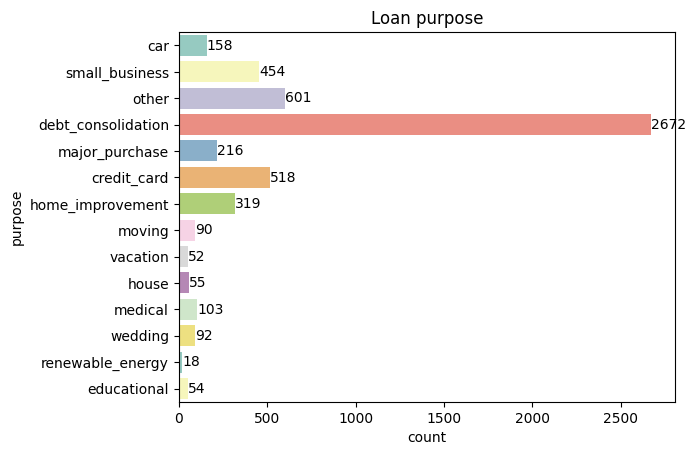

In [47]:
ax=sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'],y='purpose',palette='Set3')
sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'],y='purpose',palette='Set3')
plt.title('Loan purpose')
ax.bar_label(ax.containers[0])
plt.show()

## Some usefull insights againest various observations.

### Post gothrouh with various analysis with repect to the charged off loan for respective variables. There is more chances of defaulting when:-



1.   Applicant with there income range (20k - 40k).
2.   Applicant with experiance is 10 years.
3.   When the interst rate between 11% - 17%.
4.   Loan amount is 5k to 10k
5.   When open_ acc num is range 0 to 10 is more 10-20 is bit lesser but both
      are huge impact.
6.   Higher impact when Number of derogatory public records is 0.
7.   When loan grade is B is higher imapct & grade A,C also to be consider.
8.   Higher impact when home_ownership as RENT & MORTGAGE
9.   Unvarified loans plays a major roll.
10.  When the purpose is debt_consolidation.
11.  the term is 36 months with 57 % & number of enquiries in last 6 months is 0.



### 2). Bivarient Analysis.

Let's see how Loan Amount varies with respect to some importent categorical Values loan status.

In [48]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'issue_year', 'issue_month', 'loan_amnt_group',
       'annual_inc_grop', 'int_rate_group', 'open_acc_group', 'dti_group'],
      dtype='object')

In [49]:
Bi_varient_list1=['annual_inc_grop','int_rate_group','home_ownership','grade','verification_status', 'term']

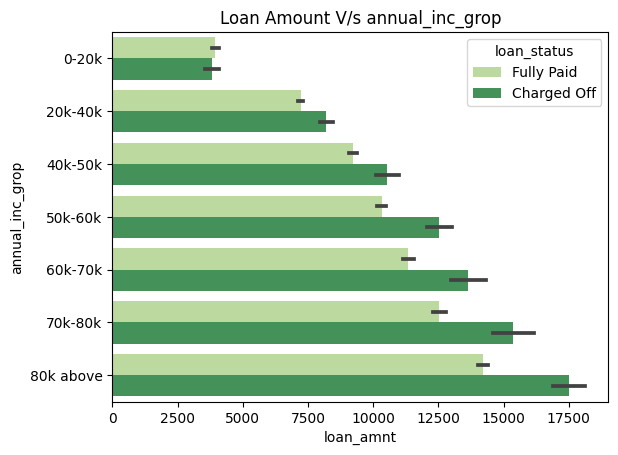

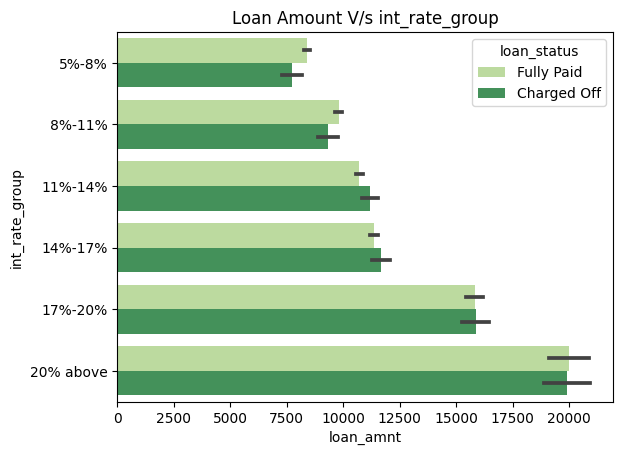

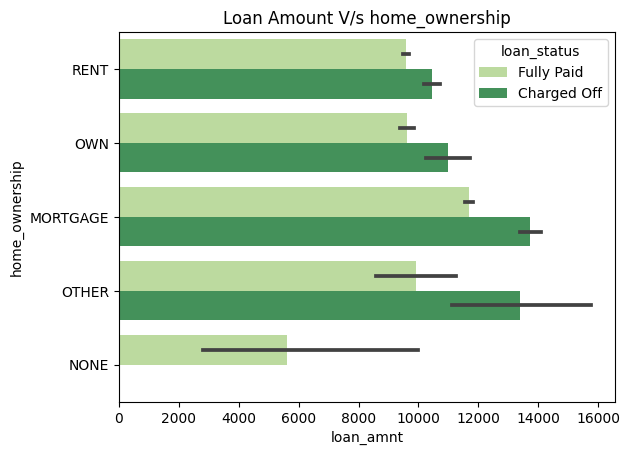

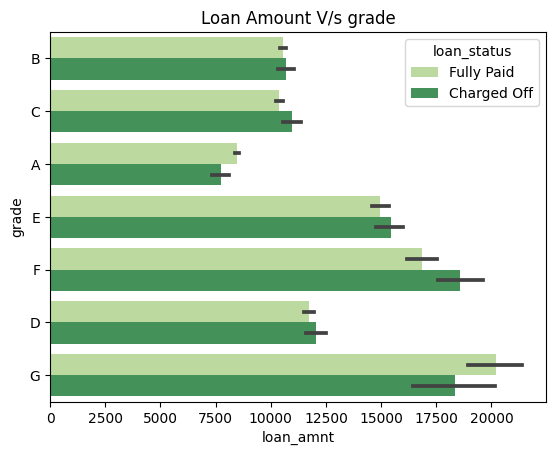

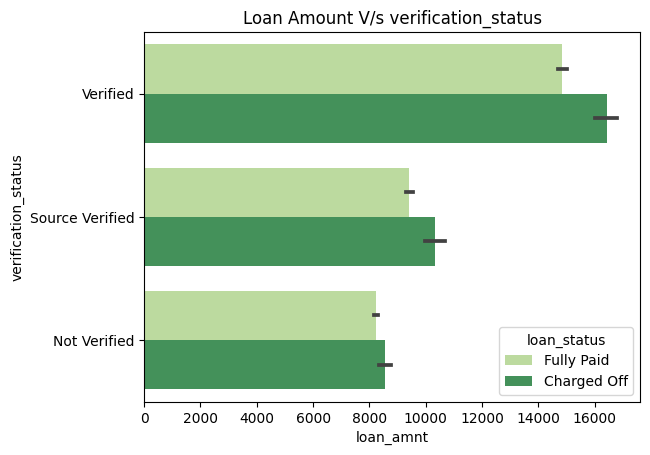

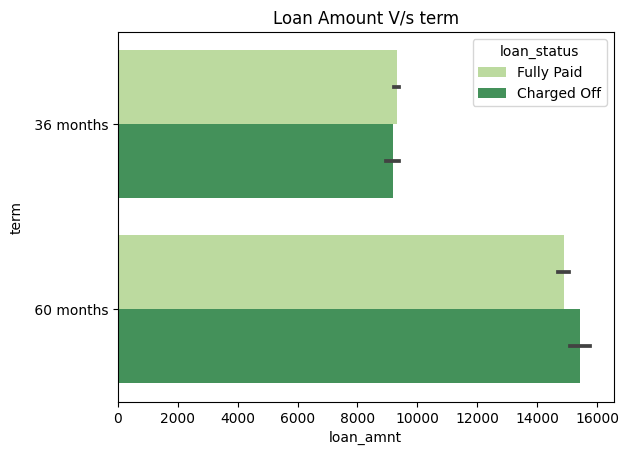

In [50]:
for col in Bi_varient_list1:
 sns.barplot(data=loan_df,y=loan_df[col],x=loan_df.loan_amnt,hue=loan_df.loan_status,palette='YlGn')
 plt.title('Loan Amount V/s '+col)
 plt.show()

* Lets See how intrest rate is varies with some listed parameters.

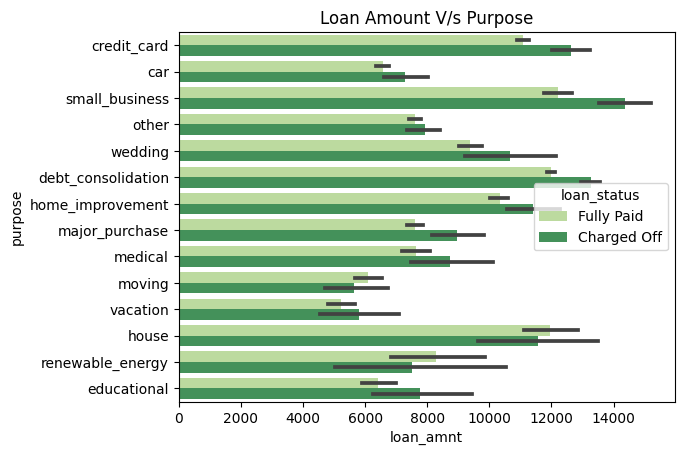

In [51]:
 sns.barplot(data=loan_df,y=loan_df['purpose'],x=loan_df.loan_amnt,hue=loan_df.loan_status,palette='YlGn')
 plt.title('Loan Amount V/s Purpose')
 plt.show()

In [52]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'issue_year', 'issue_month', 'loan_amnt_group',
       'annual_inc_grop', 'int_rate_group', 'open_acc_group', 'dti_group'],
      dtype='object')

<Axes: xlabel='int_rate_group', ylabel='annual_inc'>

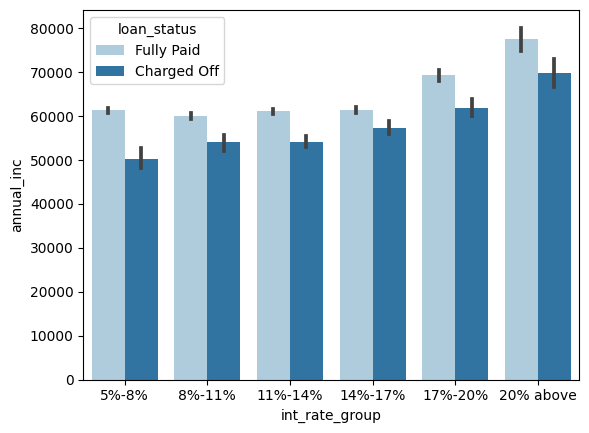

In [53]:
sns.barplot(data=loan_df,y=loan_df.annual_inc,x=loan_df.int_rate_group,hue=loan_df.loan_status,palette='Paired')

In [59]:
Bi_varient_list2=['loan_amnt_group','home_ownership','grade','verification_status','annual_inc_grop','dti_group']

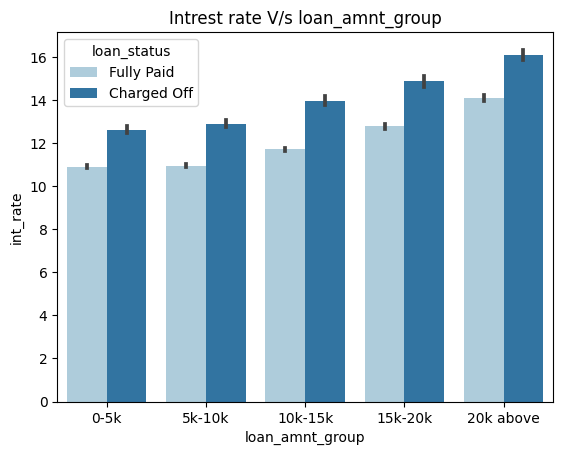

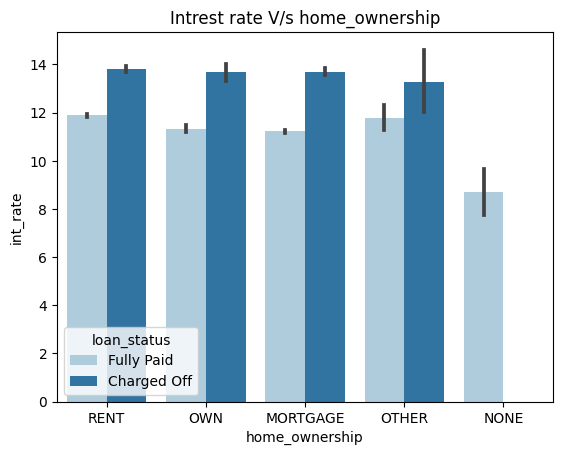

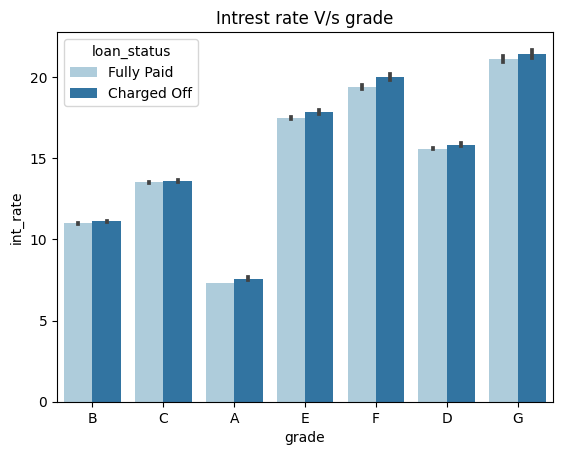

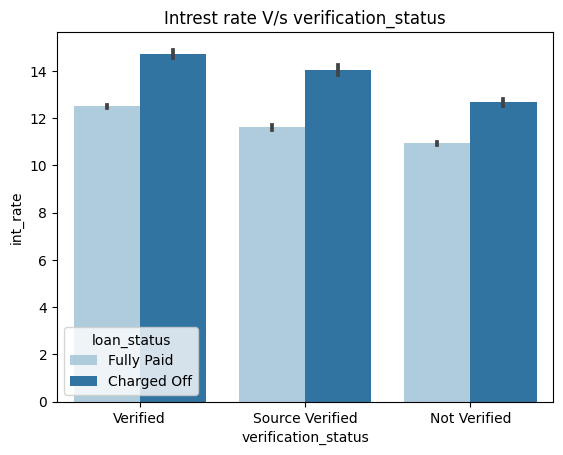

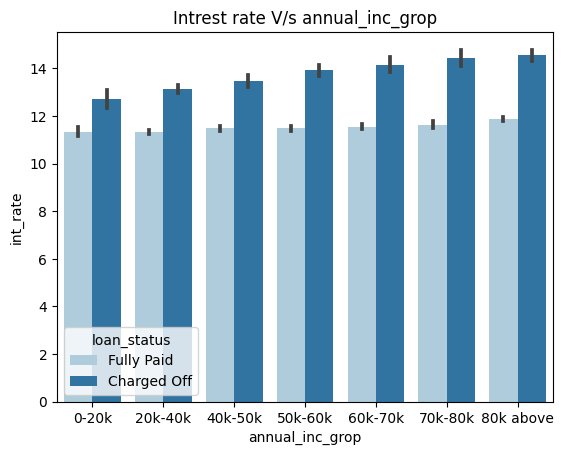

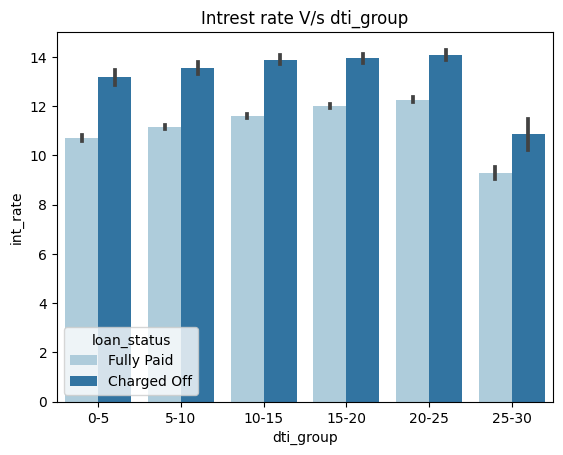

In [60]:
for col in Bi_varient_list2:
 sns.barplot(data=loan_df,x=loan_df[col],y=loan_df.int_rate,hue=loan_df.loan_status,palette='Paired')
 plt.title('Intrest rate V/s '+col)
 plt.show()

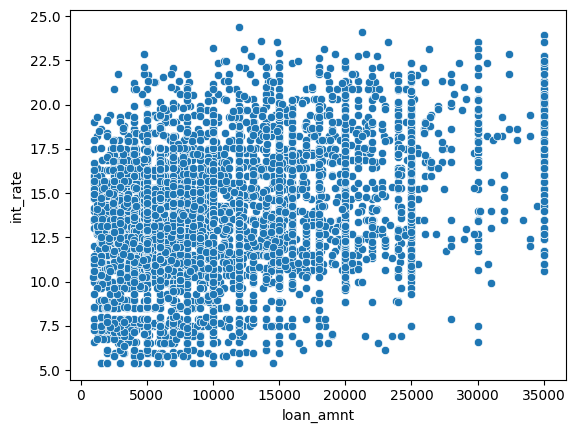

In [56]:
sns.scatterplot(data=loan_df[loan_df.loan_status=='Charged Off'],x='loan_amnt',y='int_rate')
plt.show()

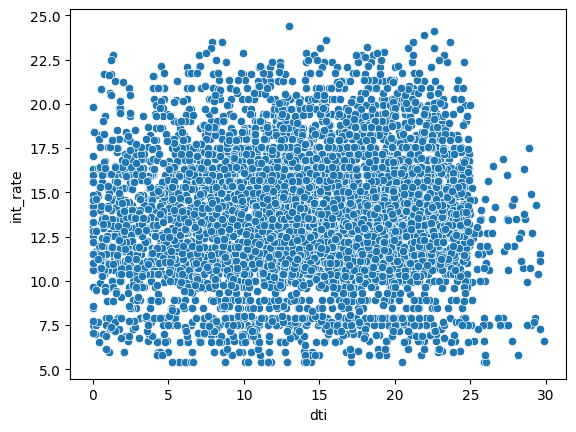

In [57]:
sns.scatterplot(data=loan_df[loan_df.loan_status=='Charged Off'],x='dti',y='int_rate')
plt.show()

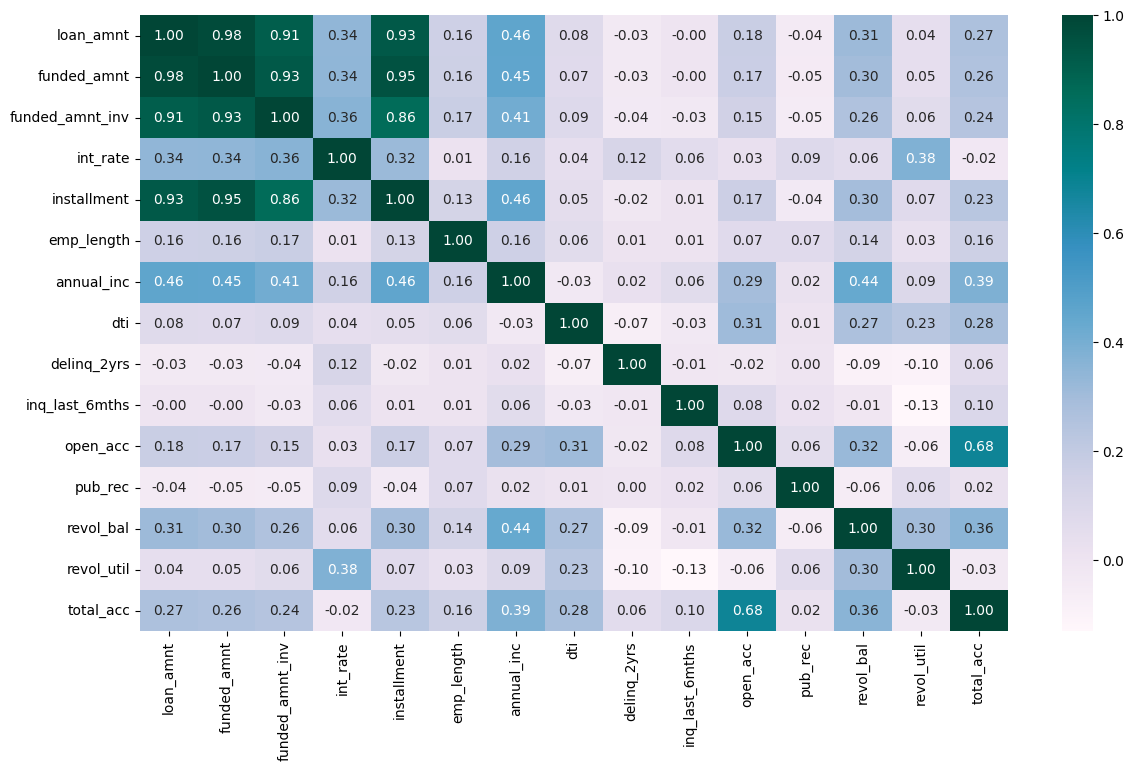

In [58]:
plt.figure(figsize=(14,8))
sns.heatmap(loan_df[loan_df.loan_status=='Charged Off'].corr(),annot=True,fmt='.2f',cmap='PuBuGn')
plt.show()

## Some usefull insights to company.

### As we looking the various analysis with respect to the charge off. There is more Probability of defaulting w.r.t below points.

* When Loan Amount is greatter than 15K for grade F & G.
* Loan amount is above 16K & loan ststus is verified.
* When Loan amount is 15K+ and annual income 80k above.
* As employee length increates & loan amount increased.
* Application with small business & loan Amount more than 14K+
* Loan amount is 70K+ and Intrest is 20% above.
